# (Bayesian) Linear Regression
For an introduction to deep learning it is generally best to start with the simplest example of linear regression. In linear regression we want to obtain a model that best describes the correlation between input data points $\mathbf{x}$ and output data points $\mathbf{y}$ with some model parameters. For the sake of visualization our output dimensionality is one and our input dimensionality is $D$: 

\begin{equation*}
\hat{\mathbf{y}}_i = \theta_0 + \theta_1 x_1 + ... + \theta_D x_D ~,
\end{equation*}

where $\hat{\mathbf{y}}$ is the model's prediction and $\boldsymbol{\theta}=(\theta_0,...,\theta_D)^T$ denotes the vector of model parameters. By defining $x_0=1$ we can rewrite the problem in a more compact form:

\begin{equation*}
\hat{\mathbf{y}}_i=\boldsymbol{\theta}^T \mathbf{x}_i ~.
\end{equation*}

Since no process in the real world is noise free (e.g. because of limitations in measurement tools), we need to take this corruption into account:

\begin{equation*}
y_i=\boldsymbol{\theta}^T\mathbf{x}_i + \epsilon_i \quad \textrm{with} \quad \epsilon_i \sim \mathcal{N}(0,\sigma^2) ~.
\end{equation*}

To generate the example data we must first import the necessary packages.

In [13]:
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import seaborn as sns
sns.set()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

np.random.seed(9)

### Generating example data
$y = \theta_0 + \theta_1 x + \epsilon = -1 + x + \epsilon \quad \textrm{with} \quad \epsilon \sim \mathcal{N}(0,0.15)$ .

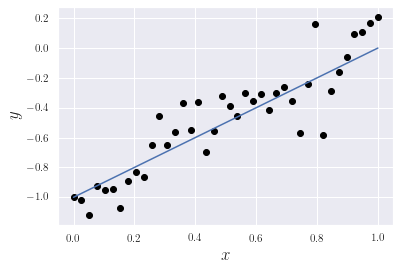

In [14]:
x = np.linspace(0, 1, 40)

weights = np.array([-1, 1])
pol_grad = len(weights)
no_test_pts = 10

_x = np.hstack((np.ones((len(x), 1)), x[:,np.newaxis]))
y_true = (_x @ weights[:,np.newaxis]).flatten()
y_noisy = y_true + np.random.normal(0, 0.15, len(y_true))
y_noisy = y_noisy.transpose()
y_train, x_train = y_noisy[:-no_test_pts], x[:-no_test_pts]
y_test, x_test = y_noisy[-no_test_pts:], x[-no_test_pts:]

plt.plot(x, y_true)
plt.scatter(x, y_noisy, color='black')
plt.xlabel(r'$x$', fontsize=17)
plt.ylabel(r'$y$', fontsize=17)
plt.show()

### Maximum Likelihood Estimation

Since we assume our noise to be Gaussian, we can model each output value with a Gaussian distribution:

\begin{align}
p(y_i|\mathbf{x}_i,\boldsymbol{\theta},\sigma^2) &= \mathcal{N}(\boldsymbol{\theta}^T \mathbf{x}_i,\sigma^2) \\
    &= \frac{1}{\sigma \sqrt{2\pi}} \exp\left\{ -\frac{1}{2\sigma^2} \left( y_i - \boldsymbol{\theta}^T \mathbf{x}_i \right)^2 \right\} ~.
\end{align}

$p(y_i|\mathbf{x}_i,\boldsymbol{\theta},\sigma^2)$ is known as likelihood. It measures how well our model with parameters $\boldsymbol{\theta}$ and variance $\sigma^2$ is to generate the observed data. If we further assume independent and identically distributed (i.i.d.) data, the likelihood for all data points factorizes:

\begin{equation*}
    p(\mathbf{Y}|\mathbf{X},\boldsymbol{\theta},\sigma^2) = \prod_{i=1}^{N} p(y_i|\mathbf{x}_i,\boldsymbol{\theta},\sigma^2) ~,
\end{equation*}

with $\mathbf{Y}=(y_1,...,y_N)^T$ and each row of the $N \times D$ matrix $\mathbf{X}$ consists of an observation of the feature vector $\mathbf{x}_i$. Since we have one-dimensional output data, we will denote the dataset outputs with $\mathbf{y}$ here, since each data point is one-dimensional and we, thus, have a vector. The above equation is referred to as likelihood function $\mathcal{L}(\boldsymbol{\theta})$. For more complex models the observation usually is not trivial and requires techniques such as gradient descent, but for linear regression the solution can be found analytically by transforming the product into a sum by taking the logarithm:

\begin{equation*}
    \begin{aligned}
    %\left[\hat{\boldsymbol{\theta}}, \hat{\sigma}^2\right] &=
    \displaystyle\textrm{arg max}_{\theta, \sigma^2} \sum_{n=1}^{N} \log p\left(y_i|\mathbf{x}_i,\boldsymbol{\theta},\sigma^2\right) 
    &= \displaystyle\textrm{arg max}_{\theta, \sigma^2} \sum_{n=1}^{N} \log \frac{1}{\sigma \sqrt{2\pi}} \exp\left\{ -\frac{1}{2\sigma^2} \left( y_i - \boldsymbol{\theta}^T \mathbf{x}_i \right)^2 \right\} \\
    &= \displaystyle\textrm{arg max}_{\theta, \sigma^2} \sum_{n=1}^{N} \log \frac{1}{\sigma\sqrt{2\pi}} - \sum_{n=1}^{N} \frac{1}{2\sigma^2} \left(y_i - \boldsymbol{\theta}^T \mathbf{x}_i\right)^2 \\
    &= \displaystyle\textrm{arg max}_{\theta, \sigma^2} - N \log \sigma\sqrt{2\pi} - \frac{1}{2\sigma^2} \sum_{n=1}^{N} \left(y_i - \boldsymbol{\theta}^T \mathbf{x}_i\right)^2 \\
    &= \displaystyle\textrm{arg max}_{\theta, \sigma^2} -N \log \sigma \sqrt{2\pi} - \frac{1}{2\sigma^2} \left(\mathbf{y} - \mathbf{X}\boldsymbol{\theta})^T (\mathbf{y} - \mathbf{X}\boldsymbol{\theta}\right) ~.
    \end{aligned}
\end{equation*}

Since the likelihood function is convex, when the error is assumed to be Gaussian distributed, the optimal solutions can be found by taking the derivative with respect to $\boldsymbol{\theta}$ and $\sigma^2$ and equating to zero:

\begin{equation*}
    \begin{gathered}
    \frac{\partial \log \mathcal{L}}{\partial\boldsymbol{\theta}} = -\frac{1}{\sigma^2}\left(\mathbf{X}^T\mathbf{X}\boldsymbol{\theta}-\mathbf{X}^T\mathbf{y}\right)=0 ~,\\
    \frac{\partial\log\mathcal{L}}{\partial\sigma^2} = -\frac{N}{\sigma^2} + \frac{1}{(\sigma^2)^2} \left(\mathbf{y} - \mathbf{X}\boldsymbol{\theta}\right)^T \left(\mathbf{y} - \mathbf{X}\boldsymbol{\theta}\right) = 0 ~,\\
    \hat{\boldsymbol{\theta}} = \left( \mathbf{X}^T\mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{y} ~,\;\;\;\; \hat{\sigma}^2 = \frac{1}{N}\left(\mathbf{y} - \mathbf{X}\boldsymbol{\theta}\right)^T \left(\mathbf{y} - \mathbf{X}\boldsymbol{\theta}\right) ~.
    \end{gathered}
\end{equation*}

In order to better fit the data the input features are transformed using basis functions $\phi_p(x)=x^p$. The new features are gathered in the design matrix $\boldsymbol{\Phi}$ of size $N \times M$ where each row is the feature vector obtained by transforming one observation, $\boldsymbol{\phi}_i=\left( \phi_1(x_i),...,\phi_M(x_i) \right)$. The basic equations from above are unchanged, $\mathbf{X}$ is just substituted by $\boldsymbol{\Phi}$. More simplistic, the model is then given by:

\begin{equation*}
\hat{y}_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + ... + \theta_M x_i^M ~.
\end{equation*}

If we solve for the model parameters in the described manner, the solution is referred to as maximum likelihood estimate (MLE).

In [15]:
ys, nlls, test_mses, covs, variances = [], [], [], [], []
pol_grads = [2, 4, 7]
max_grad = 10
_pol_grads = np.array([i for i in range(1, max_grad)])
for i in _pol_grads:#range(200, 202):
    
    X = np.array([x_train**k for k in range(i)]).transpose()
    X_test = np.array([x**k for k in range(i)]).transpose()
    
    w = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y_train
    
    mean = X_test @ w
    var = (1/y_train.shape[0]) * (y_train - X @ w).transpose() @ (y_train - X @ w)

    cov = var * np.linalg.inv(X.transpose() @ X)
    
    nll = y_train.shape[0] * np.log(np.sqrt(var)*2*np.pi) + (1 / (2*var)) * (y_train - X @ w).transpose() @ (y_train - X @ w)
    
    train_mse = (1 / len(y_train)) * ((y_train.flatten() - X @ w) ** 2).sum()
    test_mse = (1 / no_test_pts) * ((y_test.flatten() - mean[-no_test_pts:]) ** 2).sum()

    ys.append(mean)
    nlls.append(nll)
    test_mses.append(test_mse)
    covs.append(cov)
    variances.append(var)

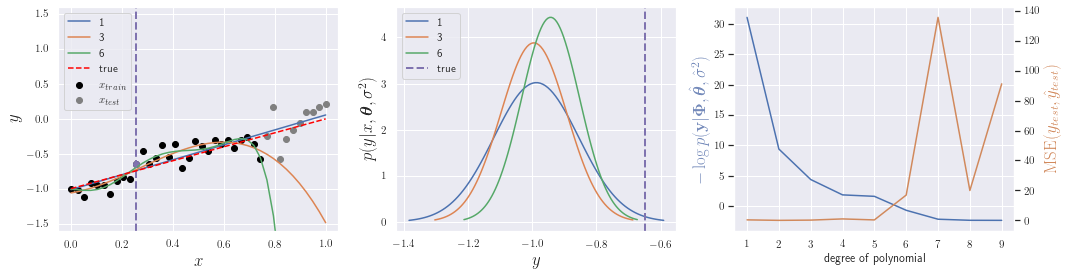

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
#idx_gaussian = np.random.randint(0, len(x_train))
idx_gaussian = 10
pt = [x_train[idx_gaussian], y_train[idx_gaussian]]

ax1.scatter(x_train,y_train, color='black', label=r'$x_{train}$')
ax1.scatter(x_test, y_test, color='gray', label=r'$x_{test}$')

for i in pol_grads:
    _y = ys[np.where(_pol_grads == i)[0][0]]
    ax1.plot(x, _y, label=str(i-1))
    
    idx_y = np.where(_pol_grads == i)[0][0]
    _y = ys[idx_y]
    mu = _y[idx_y]
    sigma = np.sqrt(variances[idx_y])
    _x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(_x, stats.norm.pdf(_x, mu, sigma), label=str(i-1))
    
ax1.scatter(pt[0], pt[1], color='#7F73AF')
ax1.axvline(pt[0], color='#7F73AF', linestyle='--', linewidth=2)
ax1.plot(x,y_true, color='red', linestyle='--', label='true')
ax1.set_xlabel(r'$x$', fontsize=17)
ax1.set_ylabel(r'$y$', fontsize=17)
ax1.legend()
ax1.set_ylim([-1.6,1.6])
ax2.axvline(pt[1], color='#7F73AF', linestyle='--', linewidth=2, label='true')
ax2.legend()

ax2.set_xlabel(r'$y$', fontsize=17)
ax2.set_ylabel(r'$p(y|x,\bm{\theta},\sigma^2)$', fontsize=17)

ax3.plot(range(1, len(nlls)+1), nlls)
ax3.set_xlabel('degree of polynomial')
ax3.set_ylabel(r'$-\log p(\mathbf{y}|\boldsymbol{\Phi},\hat{\boldsymbol{\theta}},\hat{\sigma}^2)$', 
                      color='#748ABA', fontsize=17)
ax3.set_xticks([int(i) for i in range(1, len(nlls)+1)])
ax31 = ax3.twinx()
ax31.plot(range(1, len(test_mses)+1), test_mses, color='#D1895C')
ax31.set_ylabel(r'$\textrm{MSE}(y_{test}, \hat{y}_{test})$', color='#D1895C', fontsize=17)
ax31.grid(None)

plt.tight_layout()

plt.show()

## Maximum A Posterior

The Maximum Likelihood Estimation described in the previous chapter is also called frequentist approach. Even with just two data points the model would give one solution as the only true one. Thus, MLE posses the disadvantage of being overconfident in its prediction. Remedy comes in the form of the Bayes Theorem, which provides the possibility of including some prior believe in the model prior of seeing any data. Given a data set $\mathcal{D}=\{\mathbf{X}, \mathbf{Y}\}$ and some model parameter $\boldsymbol{\theta}$ Bayes Theorem is given by:

\begin{equation}
    \begin{gathered}    p(\boldsymbol{\theta}|\mathbf{X},\mathbf{Y},\sigma^2)=\frac{p(\mathbf{Y}|\mathbf{X},\boldsymbol{\theta},\sigma^2)p(\boldsymbol{\theta})}{p(\mathbf{Y}|\mathbf{X},\sigma^2)} = \frac{p(\mathbf{Y}|\mathbf{X},\boldsymbol{\theta},\sigma^2)p(\boldsymbol{\theta})}{\int p(\mathbf{Y}|\mathbf{X},\boldsymbol{\theta},\sigma^2)p(\boldsymbol{\theta}) d\boldsymbol{\theta}} ~,\\\\
    \textrm{posterior} = \frac{\textrm{likelihood} \times \textrm{prior}}{\textrm{evidence}} ~,
    \end{gathered}
\end{equation}

where $\mathbf{X}$ is the matrix of individual data points $\mathbf{x}_i$. The likelihood is multiplied by the prior $p(\boldsymbol{\theta})$, which can also be designed to express zero prior knowledge about the model also called un-informative prior. We can for example use a uniform prior assigning equal probability for each possible parameter configuration. The product of likelihood and prior has to be normalized to yield a valid probability distribution, which is done by the evidence $p(\mathbf{Y}|\mathbf{X},\sigma^2)$. The evidence or marginal likelihood is the probability for seeing this particular data and is obtained by marginalizing out all possible parameter configurations. Performing these steps yields the posterior $p(\boldsymbol{\theta}|\mathbf{X},\mathbf{Y},\sigma^2)$, which expresses the probability for the parameter given some data.

For a new data point $(\mathbf{x}_*,\mathbf{y}_*)$ the prediction of the model is obtained by considering the predictions made using all possible parameter setting, weighted by their posterior probability:

\begin{equation}
    p(\mathbf{y_*}|\mathbf{x_*},\mathbf{Y},\mathbf{X},\sigma^2)=\int p(\mathbf{y_*}|\mathbf{x_*},\boldsymbol{\theta})p(\boldsymbol{\theta}|\mathbf{X},\mathbf{Y},\sigma^2)\mathrm{d}\boldsymbol{\theta} ~.
\end{equation}

Problematically this integral becomes intractable for even small models that are non-linear.

Before we turn our view to the fully Bayesian approach, we first consider the maximum a posteriori (MAP) estimation of the model parameter. We will again perform polynomial regression, so we will substitute $\mathbf{X}$ with $\boldsymbol{\Phi}$. Since we also have a one-dimensional output $\mathbf{Y}$ becomes $\mathbf{y}$. The MAP estimate makes use of the proportionality of posterior and the product of likelihood and prior without taking the evidence into account:

\begin{equation}
    p(\boldsymbol{\theta}|\mathbf{y},\boldsymbol{\Phi},\beta,\alpha) \propto p(\mathbf{y}|\boldsymbol{\Phi},\boldsymbol{\theta},\beta) p(\boldsymbol{\theta}|\alpha) ~,
\end{equation}

with a new parameter $\alpha$ governing the shape of the prior distribution and setting $\beta=\sigma^{-2}$ for consistency with later chapters. We consider a Gaussian distribution as prior governed by the mentioned precision hyperparameter $\alpha$

\begin{equation}
    p(\boldsymbol{\theta}|\alpha) = \mathcal{N} (\boldsymbol{\theta}|\mathbf{0},\alpha^{-1}\mathbf{I}) = \left(\frac{\alpha}{2\pi}\right)^{\frac{M+1}{2}} \exp \left\{ - \frac{\alpha}{2} \boldsymbol{\theta}^T\boldsymbol{\theta}\right\} ~,
\end{equation}

where $M+1$ is the total number of elements in the vector $\boldsymbol{\theta}$ for an $M^{th}$ order polynomial. The optimal parameters can again be found with

\begin{equation}
    \hat{\boldsymbol{\theta}} = \displaystyle\textrm{arg max}_{\boldsymbol{\theta}} \; p(\boldsymbol{\theta}|\mathbf{y},\boldsymbol{\Phi},\beta,\alpha) ~.
\end{equation}

With the probability for the likelihood

\begin{equation}
    p(\mathbf{y}|\boldsymbol{\Phi},\boldsymbol{\theta},\beta) = \mathcal{N}(\boldsymbol{\Phi}\boldsymbol{\theta},\beta^{-1}\mathbf{I})
\end{equation}

the maximum a posteriori estimate becomes

\begin{equation}
    \begin{aligned}
    p(\boldsymbol{\theta}|\mathbf{y},\boldsymbol{\Phi},\beta,\alpha) &\propto \exp \left\{  -\frac{\beta}{2} (\mathbf{y} - \boldsymbol{\Phi}\boldsymbol{\theta})^T (\mathbf{y} - \boldsymbol{\Phi}\boldsymbol{\theta}) \right\} \exp \left\{ - \frac{\alpha}{2} \boldsymbol{\theta}^T\boldsymbol{\theta}\right\} \\
    \log p(\boldsymbol{\theta}|\mathbf{y},\boldsymbol{\Phi},\beta,\alpha) &\propto \mathbf{y}^T\mathbf{y} - 2\mathbf{y}^T\boldsymbol{\Phi}\boldsymbol{\theta} + \boldsymbol{\theta}^T\boldsymbol{\Phi}^T\boldsymbol{\Phi}\boldsymbol{\theta} + \frac{\alpha}{\beta} \boldsymbol{\theta}^T\mathbf{I}\boldsymbol{\theta} =\mathcal{L}(\boldsymbol{\theta}) ~.
    \end{aligned}
\end{equation}

The above equation is referred to as weight decay with factor $\alpha / \beta$ usually denoted by $\lambda$, penalizing high values for the parameter $\boldsymbol{\theta}$ and thereby preventing overfitting. If a Gaussian prior is chosen $\mathrm{L}_2$ regularization is the consequence, while a Laplacian prior leads to $\mathrm{L}_1$ regularization. The optimal parameters are obtained by taking the derivative and equating to zero similar to MLE:

\begin{equation}
    \begin{gathered}
    \frac{\partial \mathcal{L}(\boldsymbol{\theta})}{\partial\boldsymbol{\theta}} = -2\boldsymbol{\Phi}^T\mathbf{y} + 2\left(\boldsymbol{\Phi}^T\boldsymbol{\Phi} + \frac{\alpha}{\beta}\mathbf{I} \right)\boldsymbol{\theta} ~, \\
    \hat{\boldsymbol{\theta}} = \left(\boldsymbol{\Phi}^T\boldsymbol{\Phi} + \frac{\alpha}{\beta}\mathbf{I}\right)^{-1} \boldsymbol{\Phi}^T\mathbf{y} ~.
    \end{gathered}
\end{equation}

Intuitively, the above equation for MAP estimation is benefiticial for poorly conditioned problems, where our model exhibits many degrees of freedom but we only have a few data points at our disposal (e.g. in medical studies with few probands but a lot of genes to monitor). Inverting the matrix $\boldsymbol{\Phi}^T\boldsymbol{\Phi}$ can be ill conditioned, since it might be close to singular because $\boldsymbol{\Phi}$ has a lot more columns than rows. The problem is solved by adding small values to the diagonal as in above equation.

In [19]:
ys_map, nlls_map, test_mses_map, covs_map, variances_map = [], [], [], [], []

pol_grads = [5, 7, 9]
max_grad = 10

_pol_grads = np.array([i for i in range(1, max_grad)])

_lambda = 0.6

for i in _pol_grads:
    
    X = np.array([x_train**k for k in range(i)]).transpose()
    X_test = np.array([x**k for k in range(i)]).transpose()
    
    w = np.linalg.inv(X.transpose() @ X + _lambda * np.ones((i, i))) @ X.transpose() @ y_train
    
    mean = X_test @ w
    var = (1/y_train.shape[0]) * (y_train - X @ w).transpose() @ (y_train - X @ w)

    cov = var * np.linalg.inv(X.transpose() @ X)
    
    nll = y_train.shape[0] * np.log(np.sqrt(var)*2*np.pi) + (1 / (2*var)) * (y_train - X @ w).transpose() @ (y_train - X @ w)
    
    train_mse = (1 / len(y_train)) * ((y_train.flatten() - X @ w) ** 2).sum()
    test_mse = (1 / no_test_pts) * ((y_test.flatten() - mean[-no_test_pts:]) ** 2).sum()

    ys_map.append(mean)
    nlls_map.append(nll)
    test_mses_map.append(test_mse)
    covs_map.append(cov)
    variances_map.append(var)

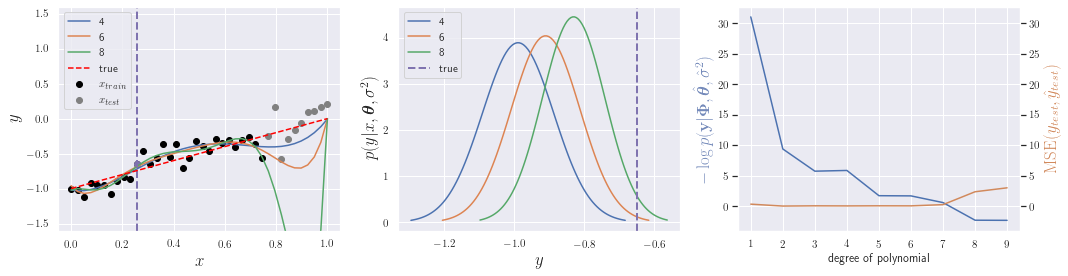

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

#idx_gaussian = np.random.randint(0, len(x_train))
pt = [x_train[idx_gaussian], y_train[idx_gaussian]]

ax1.scatter(x_train,y_train, color='black', label=r'$x_{train}$')
ax1.scatter(x_test, y_test, color='gray', label=r'$x_{test}$')

for i in pol_grads:
    _y = ys_map[np.where(_pol_grads == i)[0][0]]
    ax1.plot(x, _y, label=str(i-1))
    
    idx_y = np.where(_pol_grads == i)[0][0]
    _y = ys_map[idx_y]
    mu = _y[idx_y]
    sigma = np.sqrt(variances_map[idx_y])
    _x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(_x, stats.norm.pdf(_x, mu, sigma), label=str(i-1))
    
ax1.scatter(pt[0], pt[1], color='#7F73AF')
ax1.axvline(pt[0], color='#7F73AF', linestyle='--', linewidth=2)
ax1.plot(x,y_true, color='red', linestyle='--', label='true')
ax1.set_xlabel(r'$x$', fontsize=17)
ax1.set_ylabel(r'$y$', fontsize=17)
ax1.legend()
ax1.set_ylim([-1.6,1.6])

ax2.set_xlabel(r'$y$', fontsize=17)
ax2.set_ylabel(r'$p(y|x,\boldsymbol{\theta},\sigma^2)$', fontsize=17)

ax2.axvline(pt[1], color='#7F73AF', linestyle='--', linewidth=2, label='true')
ax2.legend()

ax3.plot(range(1, len(nlls_map)+1), nlls_map)
ax3.set_xlabel('degree of polynomial')
ax3.set_ylabel(r'$-\log p(\mathbf{y}|\boldsymbol{\Phi},\hat{\boldsymbol{\theta}},\hat{\sigma}^2)$', 
                      color='#748ABA', fontsize=17)
ax3.set_xticks([int(i) for i in range(1, len(nlls)+1)])
ax31 = ax3.twinx()
ax31.plot(range(1, len(test_mses_map)+1), test_mses_map, color='#D1895C')
ax31.set_ylabel(r'$\textrm{MSE}(y_{test}, \hat{y}_{test})$', color='#D1895C', fontsize=17)
ax31.set_ylim(ax3.get_ylim())
ax31.grid(None)

plt.tight_layout()
plt.show()

## Bayesian Linear Regression

Solving the marginal likelihood in Bayes Theorem is often intractable, but for simpler models such as linear regression it is possible, if the chosen probability distributions fulfill certain criteria. The most important one is the conjugacy of likelihood and prior, which states that both are from the same family of distributions. Gaussian distributions fulfill this criteria since a product of two Gaussians is again a Gaussian.\\
In order to compute the posterior mean and variance for the linear regression of our example, we first need to look at the shape of the posterior, excluding all terms that are not a function of the model parameters:

\begin{equation}
    \begin{aligned}
    p(\boldsymbol{\theta}|\boldsymbol{\Phi},\mathbf{y},\sigma^2) &= \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})\\
     &\propto \exp \left\{ -\frac{1}{2}\left(\boldsymbol{\theta} - \boldsymbol{\mu}\right)^T \boldsymbol{\Sigma}^{-1} \left(\boldsymbol{\theta} - \boldsymbol{\mu}\right)  \right\} \\
    &\propto \exp \left\{ -\frac{1}{2} \left(\boldsymbol{\theta}^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\theta} - 2\boldsymbol{\theta}^T \boldsymbol{\Sigma}^{-1}\boldsymbol{\mu} \right) \right\} ~.
    \end{aligned}
\end{equation}

As Bayes Theorem states the posterior can also be expressed as a product of likelihood and prior up to a proportionality constant, the marginal likelihood:

\begin{equation}
    \begin{gathered}
    p(\mathbf{y}|\mathbf{X},\boldsymbol{\theta},\sigma^2)=\mathcal{N}(\boldsymbol{\Phi}\boldsymbol{\theta},\sigma^2\mathbf{I})~,\;\;\;\;p(\boldsymbol{\theta})=\mathcal{N}(\boldsymbol{\mu}_0,\mathbf{S}_0)~, \\
    \begin{aligned}
    p(\boldsymbol{\theta}|\boldsymbol{\Phi},\mathbf{y},\sigma^2) &\propto \exp \left\{  -\frac{1}{2\sigma^2} \left(\mathbf{y} - \boldsymbol{\Phi}\boldsymbol{\theta}\right)^T\left(\mathbf{y} - \boldsymbol{\Phi}\boldsymbol{\theta}\right) \right\} \exp \left\{ -\frac{1}{2}\left(\boldsymbol{\theta}-\boldsymbol{\mu}_0\right)\mathbf{S}_{0}^{-1} \left(\boldsymbol{\theta} -\boldsymbol{\mu}_0\right)\right\} \\
    &\propto \exp \left\{ -\frac{1}{2} \left[\boldsymbol{\theta}^T\left(\frac{1}{\sigma^2}\boldsymbol{\Phi}^T\boldsymbol{\Phi} + \mathbf{S}_0^{-1}\right)\boldsymbol{\theta} + \boldsymbol{\theta}^T\left( \frac{1}{\sigma^2} \boldsymbol{\Phi}^T\mathbf{y} + \mathbf{S}_0^{-1}\boldsymbol{\mu}_0\right)\right]\right\} ~.
    \end{aligned}
    \end{gathered}
\end{equation}

By matching the two expression in the above equations we can find the expressions for posterior mean and variance:

\begin{equation}
    \boldsymbol{\Sigma}^{-1} = \frac{1}{\sigma^2}\boldsymbol{\Phi}^T\boldsymbol{\Phi}+\mathbf{S}_0^{-1}~,\;\;\;\; \boldsymbol{\mu} = \boldsymbol{\Sigma}\left(\frac{1}{\sigma^2}\boldsymbol{\Phi}^T\mathbf{y} + \mathbf{S}_0^{-1}\boldsymbol{\mu}_0\right) ~.
\end{equation}

We notice that, if the prior is infinitely broad, meaning $\mathbf{S}_0^{-1} \rightarrow \mathbf{0}$, the maximum likelihood estimation for the mean is recovered. To express no previous knowledge in the regression example, we will consider a fairly wide prior, an isotropic Gaussian with zero mean and variance governed by the precision parameter $\alpha$, which is the inverse of the variance

\begin{equation}
    P(\boldsymbol{\theta}|\alpha) = \mathcal{N}(\mathbf{0},\alpha^{-1}\mathbf{I}) ~.
\end{equation}

By additionally setting $\beta = \sigma^{-2}$ the posterior parameters become

\begin{equation}
    \boldsymbol{\Sigma}^{-1}=\beta\boldsymbol{\Phi}^T\boldsymbol{\Phi}+\alpha\mathbf{I}~,\;\;\;\; \boldsymbol{\mu}=\beta\boldsymbol{\Sigma}\boldsymbol{\Phi}^T\mathbf{y} ~.
\end{equation}

The main use of the posterior is to compute the predictive distribution for a new data point $(\mathbf{x}_*,\mathbf{y}_*)$ of the model as shown in Eq. \ref{eq:pred_post}. Since both distributions of that integral are Gaussians,

\begin{equation}
    p(\boldsymbol{\theta}|\boldsymbol{\Phi},\mathbf{y},\beta,\alpha) = \mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma}) ~,\;\;\;\; p(\mathbf{y}_*|\boldsymbol{\Phi}_*,\boldsymbol{\theta},\beta)=\mathcal{N}(\boldsymbol{\theta}^T\boldsymbol{\Phi}_*,\beta^{-1}) ~,
\end{equation}

the integral can be solved analytically and the predictive distribution is Gaussian as well:

\begin{equation}
    p(\mathbf{y}_*|\boldsymbol{\Phi}_*,\boldsymbol{\Phi},\mathbf{y},\beta,\alpha) = \mathcal{N}(\boldsymbol{\mu}^T\boldsymbol{\Phi}_*,\beta^{-1}+\boldsymbol{\Phi}_*^{T}\boldsymbol{\Sigma}^{-1}\boldsymbol{\Phi}_*) ~.
\end{equation}

As can be seen the predictive variance is the sum of two components, the first one being the noise in the data $\beta^{-1}$, which is constant and gets more accurate with more training data. The second component depends on the covariance of the parameters, hence an uncertain model model will make uncertain predictions. Moreover, with seeing more data the variance converges to $\beta^{-1}$, because the covariance of the parameters decreases.

So far we have assumed the parameters $\alpha$ and $\beta$ are known, however, in a fully Bayesian treatment we also have to impose prior distributions over these parameters. Unfortunately, the solution is not analytically tractable, so that an iterative approach known as Empirical Bayes has to be employed. The analytical intractability comes from the need for evaluating the evidence function

\begin{equation}
    p(\mathbf{y}|\boldsymbol{\Phi},\beta,\alpha) = \int p(\mathbf{y}|\boldsymbol{\Phi},\boldsymbol{\theta},\beta)p(\boldsymbol{\theta}|\alpha)d\boldsymbol{\theta} ~.
\end{equation}

Since even for simple models their exists no analytical solution, an iterative approach must be employed, which includes maximizing the marginal likelihood or evidence w.r.t. $\alpha$ and $\beta$.

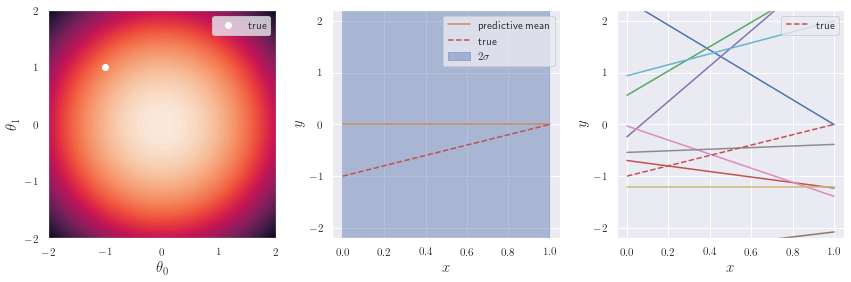

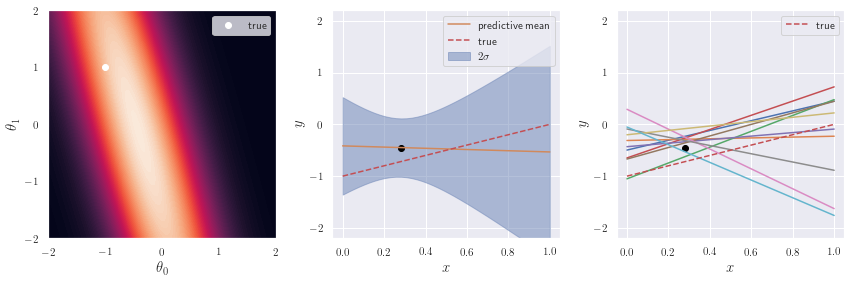

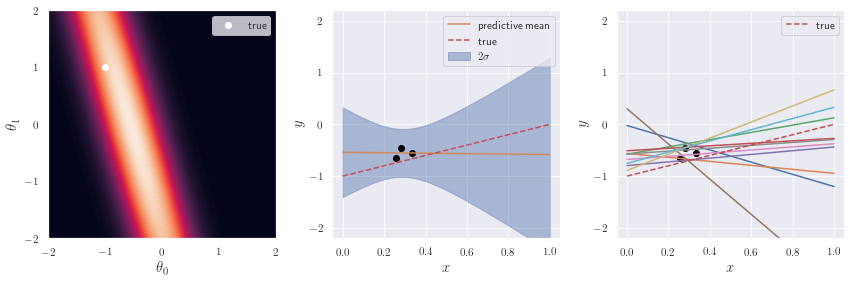

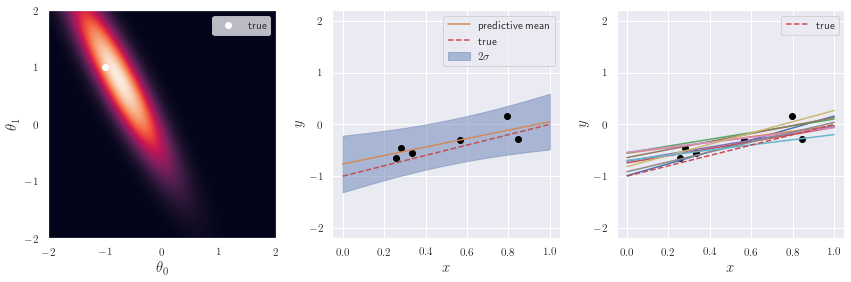

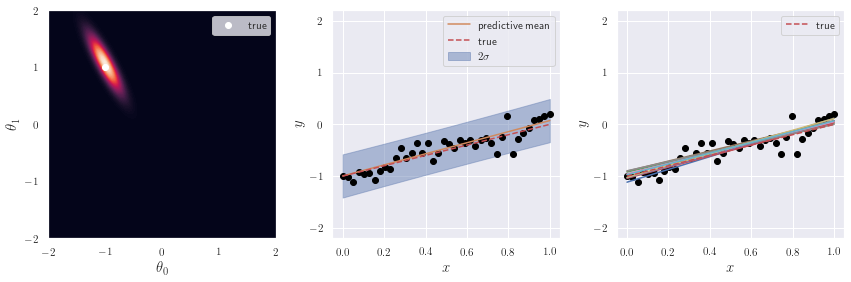

In [23]:
_x = np.hstack((np.ones((len(x), 1)), x[:,np.newaxis]))
w = np.linspace(-2, 2, 500)
W1, W2 = np.meshgrid(w, w)

pos = np.empty(W1.shape + (2,))
pos[:, :, 0] = W1
pos[:, :, 1] = W2

no_samples = [0,1,3,6,'all']
valid_idx = [i for i in range(len(x))]

alpha, beta = 2., 25. # 0.3, 1.

mu = np.zeros(2)
cov_inv = np.identity(2) / alpha

cov = np.identity(2) * alpha

x_ts, y_ts = np.array([]), np.array([])

pts_total = 0
figsize = (4,5)
for k, _no_samples in enumerate(no_samples):
    if _no_samples != 0:
        if _no_samples != 'all':
            idx = np.random.choice(valid_idx, _no_samples - pts_total, replace=False)
            pts_total = _no_samples
            for _idx in np.sort(idx)[::-1]:
                del valid_idx[np.argwhere(valid_idx==_idx)[0,0]]
            x_t, y_t = x[idx], y_noisy[idx]
            x_ts = np.hstack((x_ts, x_t))
            y_ts = np.hstack((y_ts, y_t))
        else:
            x_t, y_t = x, y_noisy
            x_ts, y_ts = x, y_noisy

        X_t = np.array([x_t**k for k in range(pol_grad)]).transpose()

        _cov_inv = cov_inv + beta * X_t.transpose() @ X_t
        cov = np.linalg.inv(_cov_inv)
        mu = cov @ (cov_inv @ mu + beta * X_t.transpose() @ y_t)
        
        cov_inv = _cov_inv
    
    y_pred_mean = _x @ mu
    y_pred_var = np.array([1 / beta + __x @ cov @ __x.transpose() for __x in _x])
    
    fig, (ax_weight_posterior, ax_posterior, ax_posterior_2) = plt.subplots(1, 3, figsize=(12,4))

    ax_posterior.plot(x, y_pred_mean, color='#D1895C', label='predictive mean')
    ax_posterior.fill_between(x, y_pred_mean + 2 * y_pred_var ** .5, y_pred_mean - 2 * y_pred_var ** .5, 
                              color='#6A83B5', alpha=0.5, label=r'$2\sigma$')
    ax_posterior.plot(x, y_true, linestyle='--', color='r', label='true')#'#D1895C')
    ax_posterior.scatter(x_ts, y_ts, color='black')
    ax_posterior.set_ylim([-2.2, 2.2])
    ax_posterior.set_yticks([i for i in range(-2, 3)])
    ax_posterior.set_xlabel(r'$x$', fontsize=15)
    ax_posterior.set_ylabel(r'$y$', fontsize=15)
    ax_posterior.legend(loc='upper right')
    ax_posterior.set_aspect(0.25)

    for _ in range(10):
        label = 'predictions' if _ == 0 else ''
        w_sample = np.random.multivariate_normal(mu, cov)
        ax_posterior_2.plot(x, (_x @ w_sample[:,np.newaxis]).flatten())#, color='#6A83B5', label=label)
    ax_posterior_2.plot(x, y_true, linestyle='--', color='r', label='true')
    ax_posterior_2.scatter(x_ts, y_ts, color='black')
    ax_posterior_2.set_yticks([i for i in range(-2, 3)])
    ax_posterior_2.set_ylim(ax_posterior.get_ylim())
    ax_posterior_2.set_xlabel(r'$x$', fontsize=15)
    ax_posterior_2.set_ylabel(r'$y$', fontsize=15)
    ax_posterior_2.legend(loc='upper right')
    ax_posterior_2.set_aspect(0.25)

    ax_weight_posterior.contourf(W1, W2, stats.multivariate_normal(mean=mu, cov=cov/0.1).pdf(pos), 100)
    ax_weight_posterior.scatter([weights[0]], [weights[1]], color='white', label='true')
    ax_weight_posterior.set_yticks([i for i in range(-2, 3)])
    ax_weight_posterior.set_xticks([i for i in range(-2, 3)])
    ax_weight_posterior.set_xlabel(r'$\theta_0$', fontsize=15)
    ax_weight_posterior.set_ylabel(r'$\theta_1$', fontsize=15)
    ax_weight_posterior.set_aspect(1)
    ax_weight_posterior.legend(loc='upper right')
    plt.tight_layout()

    plt.show()